## **The fourth in-class-exercise (40 points in total, 03/29/2022)**





Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 
https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
# Run in python console
import nltk; nltk.download('stopwords')

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
import matplotlib.pyplot as plt
%matplotlib inline
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

     |████████████████████████████████| 1.7 MB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=fd8bc72b9527cd1e336aa15bc9ce6606fe652fd966df589e5caa0e4c17fd6ccf
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [ ]:
# Write your code here


# Data collection
import pandas as pd
import tweepy as tw
my_api_key = "???????????"
my_api_secret = "??????????????"

auth = tw.OAuthHandler(my_api_key, my_api_secret)
api = tw.API(auth, wait_on_rate_limit=True)

search_query = "#covid #mask"

def getTweets():
  tweets = tw.Cursor(api.search,
              q=search_query,
              lang="en",
              since="2020-01-10").items(50)
  reviews = []
  for tweet in tweets:
    reviews.append(tweet)
  return reviews

def createTweetDataFrame():
  tweetReviews = getTweets()
  df = pd.DataFrame()\

  for review in tweetReviews:
    hashtags = []
    try:
        for hashtag in review.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=review.id, tweet_mode='extended').full_text
    except:
        pass

    df = df.append(pd.DataFrame({'username': review.user.name, 
                                               'userlocation': review.user.location,\
                                               'userdescription': review.user.description,
                                               'userverified': review.user.verified,
                                               'date': review.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': review.source}))
    df = df.reset_index(drop=True)
  return df

df = createTweetDataFrame()
df

,username,userlocation,userdescription,userverified,date,text,hashtags,source
0,Andrea Fryer,,,False,2022-04-03 23:32:00,RT @EmilyKakoullis: 22/3/22: “#EasyJet face #m...,"[EasyJet, mask, flights, EasyJet]",Twitter for iPhone
1,Edgar Allan Pooh,,Nevermore,False,2022-04-03 23:11:39,Dr. #Fauchi must be too busy making sure 5 yea...,"[Fauchi, mask]",Twitter Web App
2,John Sam,,,False,2022-04-03 22:11:40,RT @EmilyKakoullis: 22/3/22: “#EasyJet face #m...,"[EasyJet, mask, flights, EasyJet]",Yes1
3,covid airborne person,hedgeworth,retweeting anything about covid being airborne...,False,2022-04-03 22:02:27,RT @EmilyKakoullis: 22/3/22: “#EasyJet face #m...,"[EasyJet, mask, flights, EasyJet]",Aerosol retweet
4,Tejasswi's fanprakash,,An Fc account for #TejasswiPrakash for making ...,False,2022-04-03 21:58:18,RT @DelhiTimesTweet: Missing the Delhi Times p...,[Bollywood],Twitter for Android
5,its_tuba,,Here only for my #tejran ❤️🥺\n#tejasswiprakash...,False,2022-04-03 21:50:02,RT @DelhiTimesTweet: Missing the Delhi Times p...,[Bollywood],Twitter for Android
6,Dr Emily Kakoullis,"Bristol, UK",Lecturer @CardiffLaw | International Disabilit...,False,2022-04-03 21:35:37,22/3/22: “#EasyJet face #mask rule to be dropp...,"[EasyJet, mask, flights, EasyJet]",Twitter Web App
7,Mscrdeadshot,,,False,2022-04-03 21:13:09,RT @DelhiTimesTweet: Missing the Delhi Times p...,[Bollywood],Twitter for Android
8,Kotlaa Safety Shoes,,we Provide Safety Items all over Pakistan...\n...,False,2022-04-03 20:31:03,Time and Health\nhttps://t.co/iTlLXiwTGo\n#Saf...,"[Safetynot, expensive, priceless, PPE, SafetyM...",Twitter Web App
9,'cartoon' on RedBubble.,Instagram: pastexpirycom,"Vintage images and unique designs on shirts, m...",False,2022-04-03 20:25:24,$100 US Benjamin with mask.. Available on over...,"[redbubble, stickers, tshirts, mugs, masks, ma...",PEtwitpix


In [ ]:
# Convert to list
data = df.text.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]
data = [re.sub('RT', '', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

[' 22/3/22: “#EasyJet face #mask rule to be dropped on some #flights” ... '
 '3/4/22: “#EasyJet cancels 100 flights due to #…']


In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['easyjet', 'face', 'mask', 'rule', 'to', 'be', 'dropped', 'on', 'some', 'flights', 'easyjet', 'cancels', 'flights', 'due', 'to']]


In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['easyjet', 'face', 'mask', 'rule', 'to', 'be', 'dropped', 'on', 'some', 'flights', 'easyjet', 'cancels', 'flights', 'due', 'to']


In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['rule', 'drop', 'flight', 'easyjet', 'cancel', 'flight', 'due']]


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1)]]


In [ ]:
id2word[5]

'rule'

In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('cancel', 1),
  ('drop', 1),
  ('due', 1),
  ('easyjet', 1),
  ('flight', 2),
  ('rule', 1)]]

In [ ]:
# Build LDA model
Num_Topics = 3
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics= Num_Topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.344*"miss" + 0.013*"mask" + 0.013*"covid" + 0.013*"case" + '
  '0.013*"optional" + 0.013*"country" + 0.013*"lift" + 0.013*"infcte" + '
  '0.013*"decide" + 0.013*"mandatory"'),
 (1,
  '0.073*"flight" + 0.038*"wear" + 0.038*"cancel" + 0.038*"due" + 0.038*"rule" '
  '+ 0.038*"easyjet" + 0.038*"drop" + 0.030*"keep" + 0.029*"co" + '
  '0.029*"mask"'),
 (2,
  '0.033*"indoor" + 0.033*"go" + 0.019*"mug" + 0.019*"sticker" + '
  '0.019*"available" + 0.019*"magnet" + 0.019*"product" + 0.019*"redbubble" + '
  '0.019*"vpsmyas" + 0.019*"tshirt"')]


In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -4.516325957044053

Coherence Score:  0.31880801142459514


In [ ]:
!pip install datascience
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install tensorflow

     |████████████████████████████████| 69 kB 2.8 MB/s 
  Created wheel for folium: filename=folium-0.2.1-py3-none-any.whl size=79808 sha256=5ce3247afd5c0346151fd220fd1dfead4a6b30b586947ace0de470ca90f287ef
  Stored in directory: /root/.cache/pip/wheels/9a/f0/3a/3f79a6914ff5affaf50cabad60c9f4d565283283c97f0bdccf
Successfully built folium
  Attempting uninstall: folium
    Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3
     |████████████████████████████████| 462 kB 4.9 MB/s 


In [ ]:
# Visualize the topics
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.123433 -0.076537       1        1  43.275895
0      0.164225 -0.030851       2        1  35.825861
2     -0.040793  0.107388       3        1  20.898244, topic_info=          Term       Freq      Total Category  logprob  loglift
31        miss  22.000000  22.000000  Default  30.0000  30.0000
4       flight   6.000000   6.000000  Default  29.0000  29.0000
98      indoor   1.000000   1.000000  Default  28.0000  28.0000
94          go   1.000000   1.000000  Default  27.0000  27.0000
55        wear   3.000000   3.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
95        good   0.704937   1.148479   Topic3  -3.9826   1.0774
103   stranger   0.704638   1.148540   Topic3  -3.9831   1.0769
96       govts   0.704583   1.148549   Topic3  -3.9831   1.0769
60         air   0.705489   1.841292   Topic3  -3.9819   0.6062
79   situation   0.705127   1.841431   Topic3  -3.9824   0.6056

[126 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
32        1  0.762607    absence
82        2  0.799603  advisable
60        1  0.543097        air
60        3  0.543097        air
89        3  0.870743     attend
...     ...       ...        ...
48        3  0.870882    vpsmyas
55        1  0.884863       wear
56        1  0.762601        win
57        1  0.762606       work
30        2  0.799973       year

[101 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

In [ ]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()



openjdk version "11.0.14" 2022-01-18
OpenJDK Runtime Environment (build 11.0.14+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.14+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)


In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
%cd gdrive

Mounted at /content/gdrive
/content/gdrive


In [ ]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = "/content/mallet-2.0.8/bin/mallet"

In [ ]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [ ]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(11,
  [('air', 0.2),
   ('airfilter', 0.2),
   ('give', 0.2),
   ('type', 0.2),
   ('continue', 0.2),
   ('faceid', 0.0),
   ('long', 0.0),
   ('here', 0.0),
   ('care', 0.0),
   ('still', 0.0)]),
 (10,
  [('drop', 0.5),
   ('sticker', 0.16666666666666666),
   ('healthy', 0.16666666666666666),
   ('useless', 0.16666666666666666),
   ('take', 0.0),
   ('cause', 0.0),
   ('long', 0.0),
   ('rise', 0.0),
   ('tdibn', 0.0),
   ('prefer', 0.0)]),
 (2,
  [('indoor', 0.2857142857142857),
   ('face', 0.14285714285714285),
   ('safetyshoe', 0.14285714285714285),
   ('finally', 0.14285714285714285),
   ('ventilation', 0.14285714285714285),
   ('tdibn', 0.14285714285714285),
   ('cause', 0.0),
   ('long', 0.0),
   ('care', 0.0),
   ('prefer', 0.0)]),
 (6,
  [('mask', 0.5),
   ('girl', 0.16666666666666666),
   ('schoolchildren', 0.16666666666666666),
   ('finally', 0.16666666666666666),
   ('long', 0.0),
   ('rise', 0.0),
   ('still', 0.0),
   ('cause', 0.0),
   ('set', 0.0),
   ('here', 0.0)]),

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

/usr/local/lib/python3.7/dist-packages/gensim/models/wrappers/ldamallet.py:373: RuntimeWarning: invalid value encountered in true_divide
  return topics / topics.sum(axis=1)[:, None]


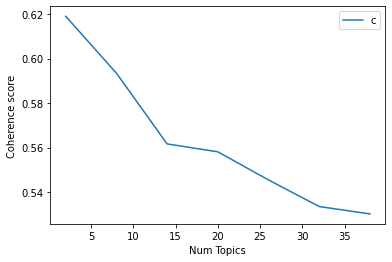

In [ ]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.619
Num Topics = 8  has Coherence Value of 0.5935
Num Topics = 14  has Coherence Value of 0.5616
Num Topics = 20  has Coherence Value of 0.5581
Num Topics = 26  has Coherence Value of 0.5454
Num Topics = 32  has Coherence Value of 0.5335
Num Topics = 38  has Coherence Value of 0.5301


In [ ]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.333*"miss" + 0.333*"good" + 0.333*"govts" + 0.000*"long" + 0.000*"still" '
  '+ 0.000*"care" + 0.000*"cause" + 0.000*"put" + 0.000*"here" + 0.000*"take"'),
 (1,
  '0.200*"finally" + 0.200*"freedom" + 0.200*"greater" + 0.200*"give" + '
  '0.200*"due" + 0.000*"long" + 0.000*"tdibn" + 0.000*"care" + 0.000*"cause" + '
  '0.000*"here"'),
 (2,
  '0.125*"advisable" + 0.125*"miss" + 0.125*"expensive" + 0.125*"type" + '
  '0.125*"safetyhelmet" + 0.125*"mom" + 0.125*"schoolchildren" + 0.125*"air" + '
  '0.000*"still" + 0.000*"take"'),
 (3,
  '0.250*"mandatory" + 0.250*"finally" + 0.250*"ventilation" + 0.250*"work" + '
  '0.000*"still" + 0.000*"faceid" + 0.000*"rise" + 0.000*"win" + 0.000*"cause" '
  '+ 0.000*"take"'),
 (4,
  '0.143*"year" + 0.143*"safetyshoe" + 0.143*"long" + 0.143*"redbubble" + '
  '0.143*"sticker" + 0.143*"make" + 0.143*"busy" + 0.000*"set" + 0.000*"here" '
  '+ 0.000*"cause"'),
 (5,
  '0.167*"drop" + 0.083*"toddler" + 0.083*"air" + 0.083*"illegal" + '
  '0.083*"tshi

In [ ]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,10.0,0.0750,"rule, flight, case, still, here, cause, long, ...",RT 22/3/22: “#EasyJet face #mask rule to be dr...
1,1,9.0,0.0845,"mask, covid, clean, fauchiisaquack, life, risk...",Dr. #Fauchi must be too busy making sure 5 yea...
2,2,13.0,0.0750,"flight, drop, win, promote, safetymask, long, ...",RT 22/3/22: “#EasyJet face #mask rule to be dr...
3,3,10.0,0.0750,"rule, flight, case, still, here, cause, long, ...",RT 22/3/22: “#EasyJet face #mask rule to be dr...
4,4,14.0,0.0556,"miss, optional, unlock, set, care, cause, long...",RT Missing the Delhi Times print edition? Clic...
5,5,14.0,0.0556,"miss, optional, unlock, set, care, cause, long...",RT Missing the Delhi Times print edition? Clic...
6,6,10.0,0.0731,"rule, flight, case, still, here, cause, long, ...",22/3/22: “#EasyJet face #mask rule to be dropp...
7,7,15.0,0.0577,"miss, lift, minute, still, long, rise, care, t...",RT Missing the Delhi Times print edition? Clic...
8,8,2.0,0.0770,"advisable, miss, expensive, type, safetyhelmet...",Time and Health https://t.co/iTlLXiwTGo #Safet...
9,9,4.0,0.0738,"year, safetyshoe, long, redbubble, sticker, ma...",$100 US Benjamin with mask.. Available on over...


In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)],axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.0577,"miss, good, govts, long, still, care, cause, p...",RT Missing the Delhi Times print edition? Clic...
1,2.0,0.0778,"advisable, miss, expensive, type, safetyhelmet...",The First Air Purifier Type Mask in the USA AM...
2,3.0,0.0625,"mandatory, finally, ventilation, work, still, ...",Keep working. Keep fighting. Keep winning. Who...
3,4.0,0.0738,"year, safetyshoe, long, redbubble, sticker, ma...",$100 US Benjamin with mask.. Available on over...
4,5.0,0.0862,"drop, toddler, air, illegal, tshirt, prefer, a...",My #Mask does not restrict me. It gives #freed...


In [ ]:
# Number of Documents for Each Topic
import pandas
df_topic_sents_keywords = df_topic_sents_keywords.sort_values(['Dominant_Topic'], ascending=False)
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts().sort_index(ascending=False)
topic_counts = topic_counts.reset_index(level=0)
topic_counts.rename(columns = {'index' : 'Dominant_Topic_Value', 'Dominant_Topic' : 'Dominant_Topic_count'}, inplace = True)
topic_counts

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
topic_contribution.rename(columns = {'Dominant_Topic_count' : 'Dominant_Topic_count_Percentage'}, inplace = True)
topic_contribution. drop("Dominant_Topic_Value", axis=1, inplace=True)
topic_contribution
topic_contribution = topic_contribution.reset_index(level=0)


# Topic Number and Keywords
df_topic_sents_keywords = df_topic_sents_keywords.sort_values(['Dominant_Topic'], ascending=False).drop_duplicates(['Dominant_Topic'])
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]
topic_num_keywords
topic_num_keywords = topic_num_keywords.reset_index(level=0)

topic_num_keywords['Topic_Counts'] = topic_counts['Dominant_Topic_count']
topic_num_keywords['Topic_Contribution'] = topic_contribution['Dominant_Topic_count_Percentage']
topic_num_keywords

,index,Dominant_Topic,Topic_Keywords,Topic_Counts,Topic_Contribution
0,37,17.0,"wear, girl, airfilter, country, absence, mug, ...",1,0.02
1,45,16.0,"decide, priceless, rise, cause, long, tdibn, s...",1,0.02
2,38,15.0,"miss, lift, minute, still, long, rise, care, t...",9,0.18
3,49,14.0,"miss, optional, unlock, set, care, cause, long...",10,0.20
4,2,13.0,"flight, drop, win, promote, safetymask, long, ...",1,0.02
5,23,11.0,"miss, rise, preach, care, cause, long, tdibn, ...",9,0.18
6,0,10.0,"rule, flight, case, still, here, cause, long, ...",3,0.06
7,1,9.0,"mask, covid, clean, fauchiisaquack, life, risk...",1,0.02
8,16,7.0,"cancel, product, rate, put, infcte, tdibn, fac...",1,0.02
9,10,6.0,"miss, situation, vpsmyas, health, useless, tak...",5,0.10


**Answer Q1:**

In this question, I used LDA to identify the number of topics. According to the results, the best number of topics is 3 since it has the highest coherence score. Topic 1 is about wearing mask in different countries, Topic 2 is about covid and mask in airplan, and Topic is about relationship between products and covid situation.


## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:
https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

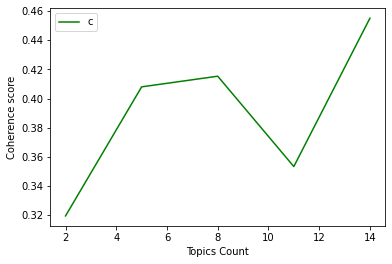

In [ ]:
# Write your code here
from gensim.models import LsiModel
LSAModel = LsiModel(corpus, 20, id2word)

# defining compute for Coherence Values in LSI
def computeCoherenceValuesLSI(dictionary, doc_term_matrix, doc_clean, stop, start, step):
    coherence_values = []
    modelList = []
#providning start,stop and step
    for num_topics in range(start, stop, step):
        # generate LSA model
        LSAModel = LsiModel(doc_term_matrix, num_topics=20, id2word = dictionary)
        modelList.append(LSAModel)
        coherencemodel = CoherenceModel(model=LSAModel, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return modelList, coherence_values

# taking all the values from above and plotting a graph
start,stop,step=2,16,3
modelListLSA, coherenceValuesLSA = computeCoherenceValuesLSI(id2word, corpus,data_lemmatized,stop, start, step)
x = range(start, stop, step)
plt.plot(x, coherenceValuesLSA, color='green')
# giving labels to axis
plt.xlabel("Topics Count")
plt.ylabel("Coherence score")
plt.legend(("conValues"), loc='best')
plt.show()

In [ ]:
# To get the topics count and the coherence values

for numberOfTopics, cv in zip(range(2, 40, 2), coherenceValuesLSA):
  print("Topics Count:", numberOfTopics, " - Coherence Value:", round(cv, 4))
pprint(LSAModel.print_topics())

Topics Count: 2  - Coherence Value: 0.3438
Topics Count: 4  - Coherence Value: 0.36
Topics Count: 6  - Coherence Value: 0.3962
Topics Count: 8  - Coherence Value: 0.4313
Topics Count: 10  - Coherence Value: 0.3667
Topics Count: 12  - Coherence Value: 0.4104
[(0,
  '0.656*"flight" + 0.328*"cancel" + 0.328*"rule" + 0.328*"due" + 0.328*"drop" '
  '+ 0.328*"easyjet" + 0.097*"covid" + 0.096*"face" + 0.088*"absence" + '
  '0.028*"mask"'),
 (1,
  '-1.000*"miss" + 0.000*"flight" + 0.000*"drop" + 0.000*"rule" + '
  '0.000*"cancel" + 0.000*"easyjet" + 0.000*"due" + 0.000*"mask" + '
  '0.000*"covid" + 0.000*"co"'),
 (2,
  '0.420*"mask" + 0.410*"wear" + 0.180*"situation" + 0.162*"co" + '
  '0.129*"finally" + 0.124*"set" + 0.124*"use" + 0.124*"faceid" + '
  '0.124*"prefer" + 0.124*"here"'),
 (3,
  '0.362*"indoor" + 0.362*"go" + 0.191*"air" + 0.183*"situation" + '
  '0.181*"pandemic" + 0.181*"clean" + 0.181*"continue" + 0.181*"attend" + '
  '0.181*"health" + 0.181*"govts"'),
 (4,
  '-0.460*"wear" + 

**Answer Q2:**

In this question, I used LSA to identify the number of topics. According to the results, the best number of topics is 8 since it has the highest coherence score. Topic 1 is about canceling flight in covid situation, Topic 2 is about wearing mask during flight, topic 3 is about flight in covid situation, topic 4 is about  health in covid area, topic 5 is about health in covid situation, topic 6 is about wearing mask in covid area, topic 7 is about product in covid situation, and topic 8 is about price of product in covid situation.


 

## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [ ]:
!pip install lda2vec
from platform import python_version
print(python_version())

  Created wheel for lda2vec: filename=lda2vec-0.16.10-py3-none-any.whl size=14433 sha256=733f8f37208a7e538dbcf705cc35c0cbe372ae483ef773e78708d6dc0965c258
  Stored in directory: /root/.cache/pip/wheels/76/51/1c/1e2960ded8d6e14b14454493fcc9c2d879a7fb99421867f177
Successfully built lda2vec


In [ ]:
from lda2vec import preprocess 
from lda2vec import Corpus 
import spacy from spacy.lang.en import English
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

try:
    import seaborn
except:
    pass

npz = np.load(open('topics.pyldavis.npz', 'r'))
dat = {k: v for (k, v) in npz.iteritems()}
dat['vocab'] = dat['vocab'].tolist()
# dat['term_frequency'] = dat['term_frequency'] * 1.0 / dat['term_frequency'].sum() 

**Answer Q3:**

The code and package backs in 2016 on python 2. Many comments changes and it doesn't work. 

Python 2 reached its end of life on January 1, 2020, and is no longer supported by the Python developer community.

## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:
%%capture
!pip install bertopic

In [ ]:
from sklearn.datasets import fetch_20newsgroups
#docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']
docs = data

In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(docs)
freq = topic_model.get_topic_info(); freq.head(5)
topic_model.get_topic(0)  # Select the most frequent topic





Batches:   0%|          | 0/2 [00:00<?, ?it/s]

2022-04-04 02:53:46,906 - BERTopic - Transformed documents to Embeddings
2022-04-04 02:53:50,527 - BERTopic - Reduced dimensionality with UMAP
2022-04-04 02:53:50,548 - BERTopic - Clustered UMAP embeddings with HDBSCAN


[('edition', 0.2209155474673615),
 ('the', 0.21495159592043536),
 ('times', 0.14998579382847163),
 ('tejasswi', 0.14998579382847163),
 ('read', 0.14998579382847163),
 ('print', 0.14998579382847163),
 ('missing', 0.14998579382847163),
 ('httpstcowgk3l91xxl', 0.14998579382847163),
 ('delhi', 0.14998579382847163),
 ('click', 0.14998579382847163)]

In [ ]:
topic_model.visualize_topics()
topic_model.visualize_distribution(probs[49], min_probability=0.015)
topic_model.visualize_hierarchy(top_n_topics=50)


In [ ]:
topic_model.visualize_barchart(top_n_topics=5)
#topic_model.visualize_heatmap(n_clusters=4, width=1000, height=1000)


In [ ]:
topic_model.visualize_term_rank()


In [ ]:
topic_model.update_topics(docs, topics, n_gram_range=(1, 2))
topic_model.get_topic(0)   # We select topic that we viewed before

[('edition', 0.1501633969070763),
 ('the', 0.146853614652342),
 ('missing', 0.09641828922007074),
 ('httpstcowgk3l91xxl bollywood', 0.09641828922007074),
 ('the edition', 0.09641828922007074),
 ('the delhi', 0.09641828922007074),
 ('tejasswi', 0.09641828922007074),
 ('read the', 0.09641828922007074),
 ('read', 0.09641828922007074),
 ('print edition', 0.09641828922007074)]

**Answer Q4:**

In this question, I used BERTopic to identify the number of topics. According to the results, the best number of topics is 2 since it has the highest coherence score. Topic 1 is about covid in different places, Topic 2 is about covid and flight. 

## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.


In this exercise, we employed three methods to identify the number of the topic in text analysis. The first method was LDA, which is a simple model and fast for topic modeling. Based on the LDA, I identified 3 topics regarding their coherence scores. The second method was based on LSA in which 8 topics were identified. The last method was the BERTopic method. The results of these three methods show that the BERTopic method provides a better outcome as the topics are more understandable and distinguished. 
The BERTopic method is better than others because it keeps important words in the topic descriptions.